<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/6%EC%9E%A5/6_3_%EC%8B%A4%EC%8A%B5_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%ED%95%99%EC%8A%B5_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.3 실습 - 인공신경망 학습
## 6.3.2 성능 개선

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston_df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/refs/heads/main/dataset/boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
boston_df.shape

(506, 14)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터분할
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(1, activation='relu'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 모델 실행
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29759.7461 - mse: 29759.7461   
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4751.3242 - mse: 4751.3242 
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1289.1147 - mse: 1289.1147
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 786.7573 - mse: 786.7573
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 640.3787 - mse: 640.3787
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 572.3228 - mse: 572.3228 
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 557.6007 - mse: 557.6007
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 499.6935 - mse: 499.6935 
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 421.4849 - mse: 421.4849 
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.7201 - mse: 282.7201
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 198.0770 - mse: 198.0770 
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 162.4437 -

In [5]:
y_pred = model.predict(X_test)
y_pred[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([26.229359], dtype=float32)

In [6]:
y_test[0]

24.0

In [7]:
y_test.shape

(127,)

In [8]:
y_pred = np.reshape(y_pred,(127,))

In [9]:
result = pd.DataFrame({'y': y_test.values,
                       'y_pred': y_pred,
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
96,50.0,15.701046,34.298954
111,27.5,0.000000,27.500000
18,50.0,32.973370,17.026630
86,16.4,0.000000,16.400000
42,50.0,34.643627,15.356373
...,...,...,...
21,29.1,29.379627,0.279627
107,24.6,24.869610,0.269610
11,18.9,19.147320,0.247320
65,20.0,20.246655,0.246655


In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 40])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [11]:
history = model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

In [12]:
history.history

{'loss': [61.482872009277344,
  61.43586730957031,
  61.04978942871094,
  60.63706588745117,
  60.604515075683594,
  60.09589767456055,
  60.04242706298828,
  59.994049072265625,
  59.63352966308594,
  59.526519775390625,
  59.386512756347656,
  59.05970764160156,
  59.15964126586914,
  58.755401611328125,
  58.6461181640625,
  58.496795654296875,
  58.26457977294922,
  58.71477127075195,
  57.85053634643555,
  57.949581146240234,
  57.5257568359375,
  57.39651107788086,
  57.21369552612305,
  56.99992370605469,
  56.946800231933594,
  56.67073440551758,
  56.56727600097656,
  56.366058349609375,
  56.25183868408203,
  56.252384185791016,
  55.92135238647461,
  55.804256439208984,
  55.694236755371094,
  55.709144592285156,
  55.42619323730469,
  55.09114074707031,
  55.53736877441406,
  55.7130241394043,
  55.582496643066406,
  54.53021240234375,
  54.41925811767578,
  54.5250244140625,
  54.16720199584961,
  54.01594924926758,
  54.435306549072266,
  53.78861618041992,
  53.690647125

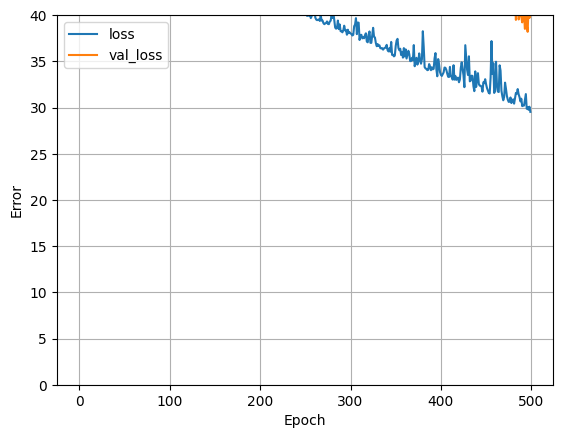

In [13]:
plot_loss(history)

In [15]:
from keras.layers import Normalization

normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(16, activation='relu'))
normalized_model.add(Dense(1, activation='relu'))

normalized_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (379, 13)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (112.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27 (112.00 B)

In [16]:
normalized_model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

normalized_history = normalized_model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

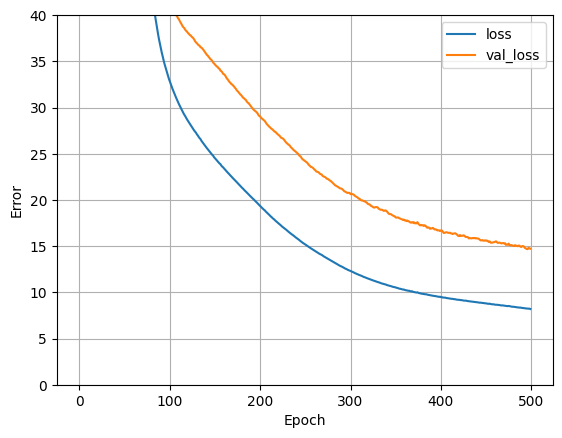

In [17]:
plot_loss(normalized_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


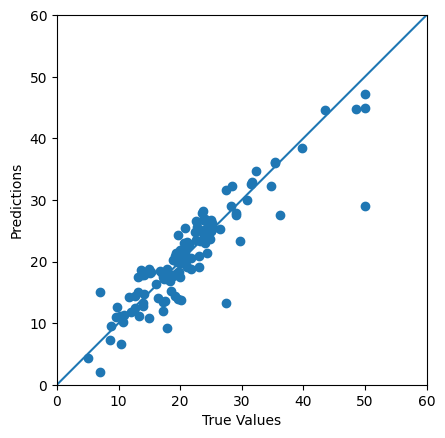

In [18]:
y_pred = normalized_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [19]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': y_test.values - y_pred, 'diff(abs)': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff(abs)'], ascending=False)

,y,y_pred,diff,diff(abs)
96,50.0,29.028677,20.971323,20.971323
111,27.5,13.211221,14.288779,14.288779
97,17.9,9.153835,8.746165,8.746165
113,36.2,27.583902,8.616098,8.616098
79,7.0,15.127573,-8.127573,8.127573
...,...,...,...,...
60,25.0,24.915831,0.084169,0.084169
90,23.2,23.265266,-0.065266,0.065266
109,24.7,24.746935,-0.046935,0.046935
82,20.9,20.901928,-0.001928,0.001928


<Axes: xlabel='diff', ylabel='Count'>

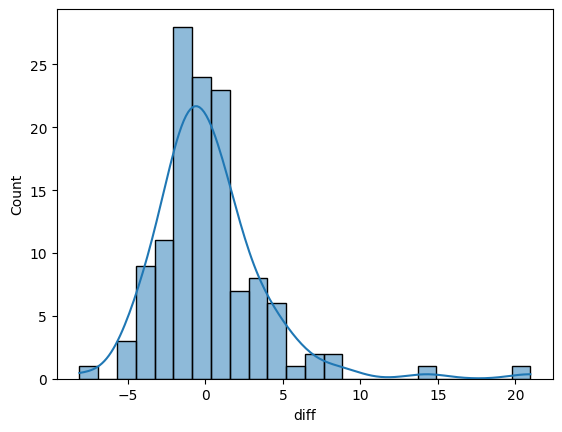

In [20]:
sns.histplot(data=result['diff'], kde = True)